In [18]:
# Install PuLP if not installed
!pip install pulp

from pulp import LpMaximize, LpProblem, LpVariable, value
import matplotlib.pyplot as plt


In [19]:
from pulp import LpMaximize, LpProblem, LpVariable, value

# Define the model
model = LpProblem("Maximize_Profit", LpMaximize)

# Decision variables
A = LpVariable("Product_A", lowBound=0)
B = LpVariable("Product_B", lowBound=0)

# Objective function: Maximize profit
# Profit: A = ₹20/unit, B = ₹30/unit
model += 20 * A + 30 * B, "Total_Profit"

# Constraints
# Machine Time: A = 2 hrs, B = 4 hrs, total available = 100 hrs
model += 2 * A + 4 * B <= 100, "Machine_Constraint"

# Labor Time: A = 3 hrs, B = 2 hrs, total available = 90 hrs
model += 3 * A + 2 * B <= 90, "Labor_Constraint"

# 💡 Display assumptions (as output of this cell)
print("✅ Optimization Model Created")
print("Product A: Profit ₹20/unit, uses 2 hrs machine & 3 hrs labor")
print("Product B: Profit ₹30/unit, uses 4 hrs machine & 2 hrs labor")
print("Machine hours available: 100")
print("Labor hours available: 90")



✅ Optimization Model Created
Product A: Profit ₹20/unit, uses 2 hrs machine & 3 hrs labor
Product B: Profit ₹30/unit, uses 4 hrs machine & 2 hrs labor
Machine hours available: 100
Labor hours available: 90


In [20]:
# Solve the model
model.solve()

# Optimal solution
a_val = A.varValue
b_val = B.varValue
total_profit = value(model.objective)

# Resource usage calculations
machine_used = 2 * a_val + 4 * b_val
labor_used = 3 * a_val + 2 * b_val

# Output results
print("✅ Status:", model.status)
print("🔧 Optimal number of Product A:", a_val)
print("🔧 Optimal number of Product B:", b_val)
print("💰 Maximum Profit: ₹", total_profit)
print("🛠️  Machine Hours Used:", machine_used, "/ 100")
print("👷 Labor Hours Used:", labor_used, "/ 90")


✅ Status: 1
🔧 Optimal number of Product A: 20.0
🔧 Optimal number of Product B: 15.0
💰 Maximum Profit: ₹ 850.0
🛠️  Machine Hours Used: 100.0 / 100
👷 Labor Hours Used: 90.0 / 90


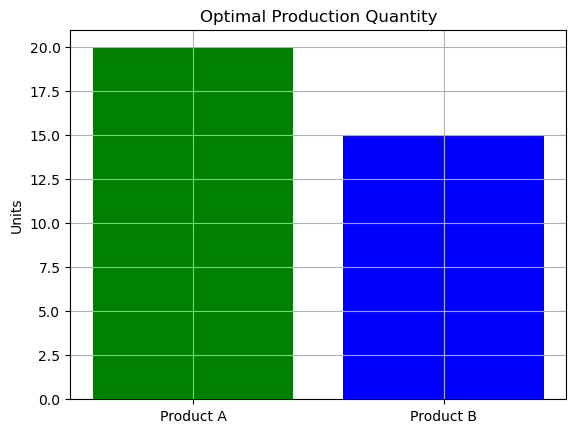

In [21]:
# Visualizing the results
labels = ['Product A', 'Product B']
values = [A.varValue, B.varValue]

# Convert None to 0 in case model didn't solve
values = [v if v is not None else 0 for v in values]

plt.bar(labels, values, color=['green', 'blue'])
plt.title("Optimal Production Quantity")
plt.ylabel("Units")
plt.grid(True)
plt.show()


In [22]:
print("📈 Business Insight:")
print(f"To maximize profit, the factory should produce {A.varValue} units of Product A and {B.varValue} units of Product B.")
print("This will fully utilize available resources and generate the highest possible profit.")


📈 Business Insight:
To maximize profit, the factory should produce 20.0 units of Product A and 15.0 units of Product B.
This will fully utilize available resources and generate the highest possible profit.


## ✅ Final Summary
This project solved a real-world business problem using Linear Programming.

We built a model to optimize production of two products under machine and labor constraints.  
Using the PuLP library, we found the exact quantities of each product to **maximize profit**, while staying within resource limits.

This task demonstrates how mathematical optimization can drive smarter business decisions.
